# Calculs pour IMM18 
# Heatmap -able pour Morphology17
# Heatmap verbes pour ISMo19

In [1]:
import codecs,math,pickle,socket
import pandas as pd
import numpy as np
import itertools as it
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [2]:
if "macbookair" in socket.gethostname().lower():
    nomRepertoire="/Users/gilles/Documents/TEMP/"
else:
    nomRepertoire="/Volumes/gilles/Transfert/Copies-iMac-GB/Python/phonemisation/"
nomRepertoire

'/Volumes/gilles/Transfert/Copies-iMac-GB/Python/phonemisation/'

In [3]:
%matplotlib inline

In [4]:
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_context("talk")
sns.set_palette("husl")

In [5]:
nomLexiqueOrg="/Users/gilles/ownCloud/Python/phonemisation/Lexique380-UTF8.txt"
nomLexiqueOrg=nomRepertoire+"Lexique380-UTF8.txt"
#nomFlexiqueVerbes="/Users/gilles/Github/flexique/data/vlexique.csv"
nomLexiqueOrg="/Users/gilles/Dropbox/Travail/Recherche/BoKu/LingInfo/Lexique3/Lexique381/Lexique381.txt"
Lexique3=pd.read_csv(nomLexiqueOrg,sep="\t",encoding="utf8")
#vlexique=pd.read_csv(nomFlexiqueVerbes,sep=",",header=None)

In [6]:
Lexique3.columns#, vlexique.columns

Index([u'1_ortho', u'2_phon', u'3_lemme', u'4_cgram', u'5_genre', u'6_nombre',
       u'7_freqlemfilms2', u'8_freqlemlivres', u'9_freqfilms2',
       u'10_freqlivres', u'11_infover', u'12_nbhomogr', u'13_nbhomoph',
       u'14_islem', u'15_nblettres', u'16_nbphons', u'17_cvcv', u'18_p_cvcv',
       u'19_voisorth', u'20_voisphon', u'21_puorth', u'22_puphon', u'23_syll',
       u'24_nbsyll', u'25_cv-cv', u'26_orthrenv', u'27_phonrenv',
       u'28_orthosyll', u'29_cgramortho', u'30_deflem', u'31_defobs',
       u'32_old20', u'33_pld20', u'34_morphoder', u'35_nbmorph'],
      dtype='object')

In [7]:
lex3=Lexique3[["1_ortho","2_phon","3_lemme","4_cgram","5_genre","6_nombre","7_freqlemfilms2","8_freqlemlivres","9_freqfilms2","10_freqlivres","11_infover"]]

- extraction des verbes de Lexique3 => *verb3*

In [8]:
lex3.loc[:,"7_freqlemfilms2"]=lex3.loc[:,"7_freqlemfilms2"].astype(float)
lex3.loc[:,"8_freqlemlivres"]=lex3.loc[:,"8_freqlemlivres"].astype(float)
lex3.loc[:,"9_freqfilms2"]=lex3.loc[:,"9_freqfilms2"].astype(float)
lex3.loc[:,"10_freqlivres"]=lex3.loc[:,"10_freqlivres"].astype(float)

/Users/gilles/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
lex3.rename(columns={'11_infover':'lex3_11_infover'}, inplace=True)

/Users/gilles/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [10]:
verb3=lex3[lex3["4_cgram"]=="VER"]

- élimination des infover mal formés
 - liste des 412 problèmes
 - remplacement des infover problématiques par un tag cohérent

In [11]:
verb3[(verb3["lex3_11_infover"].str.split(";").apply(set).str.len()!=verb3["lex3_11_infover"].str.split(";").str.len())]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover
481,abriter,abRite,abriter,VER,NaN,NaN,7.92,26.22,2.37,6.96,inf;;inf;;inf;;
659,absous,apsu,absoudre,VER,m,NaN,2.66,3.72,1.15,1.08,imp:pre:2s;ind:pre:1s;par:pas;par:pas;par:pas;
1094,accompagner,ak§paNe,accompagner,VER,NaN,NaN,90.56,124.46,24.87,22.23,inf;;
1729,acheté,aS°te,acheter,VER,m,s,290.70,148.38,72.38,28.72,par:pas;par:pas;par:pas;
1864,acquis,aki,acquérir,VER,m,NaN,8.30,29.66,3.52,13.65,ind:pas:1s;par:pas;par:pas;
2328,admirer,admiRe,admirer,VER,NaN,NaN,32.39,68.18,6.50,17.64,inf;;
2346,admis,admi,admettre,VER,m,NaN,50.05,59.46,6.74,11.35,ind:pas:1s;par:pas;par:pas;
2871,afficher,afiSe,afficher,VER,NaN,NaN,8.35,19.26,2.06,3.78,inf;;
2970,affirmé,afiRme,affirmer,VER,m,s,15.61,63.51,1.66,4.59,imp:pre:2s;par:pas;par:pas;
3040,affoler,afole,affoler,VER,NaN,NaN,5.92,20.54,1.00,2.50,inf;;


### Supprimer les tags incorrects
- imp:pre:3s n'existe pas en français

In [12]:
verb3.loc[:,"lex3_11_infover"]=verb3.loc[:,"lex3_11_infover"].str.replace("imp:pre:3s;","")

In [13]:
verb3[verb3["lex3_11_infover"].str.contains("imp:pre:3s")]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover


### réparer les infover
1. effacer les ; finaux
1. couper sur les ;
1. éliminer les doublons
1. trier la liste
1. assembler la liste et ajouter un ; final
1. créer la colonne 11_infover corrigée

In [14]:
verb3.loc[:,"11_infover"]=verb3.loc[:,"lex3_11_infover"].str.strip(";").str.split(";").apply(set).apply(list).apply(sorted).str.join(";").str.strip(";")+";"

/Users/gilles/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [15]:
verb3

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover,11_infover
2,a,a,avoir,VER,NaN,NaN,13572.40,6426.49,5498.34,1669.39,ind:pre:3s;,ind:pre:3s;
18,abaissa,abEsa,abaisser,VER,NaN,NaN,4.93,18.04,0.00,2.64,ind:pas:3s;,ind:pas:3s;
19,abaissai,abEsE,abaisser,VER,NaN,NaN,4.93,18.04,0.10,0.07,ind:pas:1s;,ind:pas:1s;
20,abaissaient,abEsE,abaisser,VER,NaN,NaN,4.93,18.04,0.00,0.41,ind:imp:3p;,ind:imp:3p;
21,abaissait,abEsE,abaisser,VER,NaN,NaN,4.93,18.04,0.02,2.50,ind:imp:3s;,ind:imp:3s;
23,abaissant,abEs@,abaisser,VER,NaN,NaN,4.93,18.04,0.01,2.50,par:pre;,par:pre;
26,abaisse,abEs,abaisser,VER,NaN,NaN,4.93,18.04,1.28,3.45,imp:pre:2s;ind:pre:1s;ind:pre:3s;,imp:pre:2s;ind:pre:1s;ind:pre:3s;
29,abaissent,abEs,abaisser,VER,NaN,NaN,4.93,18.04,0.05,0.95,ind:pre:3p;,ind:pre:3p;
30,abaisser,abese,abaisser,VER,NaN,NaN,4.93,18.04,1.09,2.91,inf;,inf;
31,abaissera,abEs°Ra,abaisser,VER,NaN,NaN,4.93,18.04,0.19,0.07,ind:fut:3s;,ind:fut:3s;


In [16]:
verb3[verb3["3_lemme"]=="aimer"]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover,11_infover
3967,aima,Ema,aimer,VER,NaN,NaN,1655.07,795.61,0.41,1.69,ind:pas:3s;,ind:pas:3s;
3971,aimai,EmE,aimer,VER,NaN,NaN,1655.07,795.61,0.20,0.81,ind:pas:1s;,ind:pas:1s;
3972,aimaient,EmE,aimer,VER,NaN,NaN,1655.07,795.61,6.20,16.42,ind:imp:3p;,ind:imp:3p;
3973,aimais,EmE,aimer,VER,NaN,NaN,1655.07,795.61,58.07,57.16,ind:imp:1s;ind:imp:2s;,ind:imp:1s;ind:imp:2s;
3974,aimait,EmE,aimer,VER,NaN,NaN,1655.07,795.61,49.57,128.72,ind:imp:3s;,ind:imp:3s;
3977,aimant,Em@,aimer,VER,NaN,NaN,1655.07,795.61,2.60,3.92,par:pre;,par:pre;
3991,aimasse,Emas,aimer,VER,NaN,NaN,1655.07,795.61,0.02,0.00,sub:imp:1s;,sub:imp:1s;
3992,aimassent,Emas,aimer,VER,NaN,NaN,1655.07,795.61,0.00,0.20,sub:imp:3p;,sub:imp:3p;
3993,aimassions,Emasj§,aimer,VER,NaN,NaN,1655.07,795.61,0.00,0.07,sub:imp:1p;,sub:imp:1p;
3994,aime,Em,aimer,VER,NaN,NaN,1655.07,795.61,751.29,257.57,imp:pre:2s;ind:pre:1s;ind:pre:1s;ind:pre:3s;su...,imp:pre:2s;ind:pre:1s;ind:pre:3s;sub:pre:1s;su...


In [17]:
verb3.groupby("11_infover")[["11_infover"]].count()

,11_infover
11_infover,
cnd:pre:1p;,242
cnd:pre:1s;,388
cnd:pre:1s;cnd:pre:2s;,567
cnd:pre:2p;,351
cnd:pre:2s;,54
cnd:pre:3p;,931
cnd:pre:3s;,1683
imp:pre:1p;,233
imp:pre:1p;ind:imp:1p;ind:pre:1p;,1


# Calculs pour Caveats with Entropy

## Préparations des données
- flemme regroupe toutes les cases d'un même lemme

In [18]:
flemme=verb3.groupby(by="3_lemme")[["11_infover"]].sum()

- calcul du nombre de cases par lemme

In [19]:
flemme["11_infover"].str.split(";").apply(set).str.len().sort_values()[-20:]

3_lemme
sentir       43
partir       43
mettre       43
dire         43
chercher     43
prendre      43
connaître    44
trouver      44
croire       44
vouloir      44
donner       44
pouvoir      44
passer       44
parler       44
savoir       45
devoir       46
aimer        46
faire        48
avoir        48
être         49
Name: 11_infover, dtype: int64

In [20]:
print len(flemme[flemme.index=="essayer"]["11_infover"].str.split(";").apply(set).values[0])

38


- ajout du genre et du nombre sur les cases du participe passé

In [21]:
def infoVer(row):
    genre=""
    nombre=""
    if isinstance(row["11_infover"],str) and "par:pas" in row["11_infover"]:
        if isinstance(row["5_genre"],str):
            genre=[row["5_genre"]]
        else:
            genre=["m","f"]
        if isinstance(row["6_nombre"],str):
            nombre=[row["6_nombre"]]
        else:
            nombre=["s","p"]
        participes=";".join(["par:pas:"+g+n for g in genre for n in nombre])
        return row["11_infover"].replace("par:pas",participes)
    elif isinstance(row["11_infover"],str) and not "par:pas" in row["11_infover"]:
        if isinstance(row["5_genre"],str) or isinstance(row["6_nombre"],str):
            print "PB avec %s, genre ou nombre sans participe passé"%row["1_ortho"]
        return row["11_infover"]
    else:
        return row["11_infover"]

In [22]:
verb3.loc[:,"infover"]=verb3.apply(lambda x: infoVer(x),axis=1)

In [23]:
verb3[(verb3["11_infover"].str.contains("par:pas")) & (verb3["3_lemme"]=="mettre")]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover,11_infover,infover
82937,mis,mi,mettre,VER,m,NaN,1004.83,1083.72,228.57,245.68,ind:pas:1s;ind:pas:2s;par:pas;par:pas;par:pas;...,ind:pas:1s;ind:pas:2s;par:pas;,ind:pas:1s;ind:pas:2s;par:pas;
82953,mise,miz,mettre,VER,f,s,1004.83,1083.72,35.33,46.69,par:pas;,par:pas;,par:pas;
82965,mises,miz,mettre,VER,f,p,1004.83,1083.72,5.36,9.05,par:pas;,par:pas;,par:pas;


In [24]:
nomRepertoire

'/Volumes/gilles/Transfert/Copies-iMac-GB/Python/phonemisation/'

In [53]:
colVerbLex3=['1_ortho','2_phon','3_lemme','4_cgram','5_genre','6_nombre','7_freqlemfilms2','8_freqlemlivres','9_freqfilms2','10_freqlivres','infover']
verbLex3=verb3[colVerbLex3].copy()
verbLex3.rename(columns={'infover':'11_infover'}, inplace=True)
if saveFiles: verbLex3.to_csv(nomRepertoire+"Verbes3.csv",sep="\t",encoding="utf8",index=False)

- ajout d'une colonne pour le nombre de cases de chaque lemme

In [25]:
flemme=verb3.groupby(by="3_lemme")[["infover"]].sum()
flemme["nbSet"]=flemme["infover"].str.split(";").apply(set).str.len()-1

In [26]:
flemme.sort_values("nbSet")[:100]

,infover,nbSet
3_lemme,,
scolariser,inf;,1
gringuer,inf;,1
grisailler,ind:pas:3p;,1
chatonner,ind:pre:3s;,1
griveler,ind:pre:3s;,1
charruer,par:pas;,1
charronner,par:pas;,1
grouiner,inf;,1
grinchir,inf;,1


- calcul du nombre de lemmes avec exactement une seule forme réparti par nom de case

In [27]:
isolatedForms=flemme[(flemme["nbSet"]==1)].groupby(by="infover").count().sort_values("nbSet")

In [28]:
isolatedForms

,nbSet
infover,
sub:pre:3s;,1
sub:imp:3s;,1
sub:imp:1s;,1
sub:pre:2s;,1
ind:pre:1p;,1
inf;inf;,2
ind:imp:1p;,2
ind:pas:2s;,2
imp:pre:1p;,3


In [29]:
set(i.rsplit(":",1)[0] for i in isolatedForms.index.tolist())

{u'imp:pre',
 u'ind:fut',
 u'ind:imp',
 u'ind:pas',
 u'ind:pre',
 u'inf;',
 u'inf;inf;',
 u'par',
 u'par:pas;par',
 u'par:pas;par:pas;par',
 u'par:pas;par:pas;par:pas;par',
 u'sub:imp',
 u'sub:pre'}

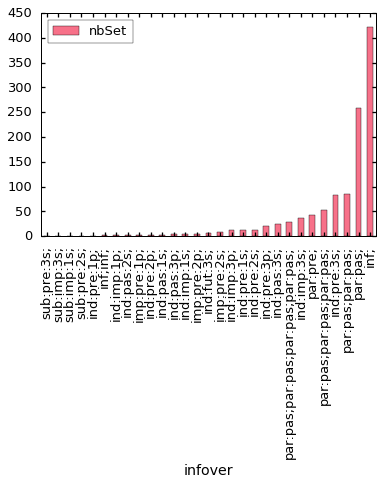

In [30]:
isolatedForms.plot(kind='bar')

## Quelle influence pour le imparfait 4/5 et le subjonctif 4/5
- combien des lexèmes ont exactement une seule forme dans Lex3 qui appartient à cette zone
 - 2 : sélecter et impulser
 - tous les deux des confusions probables avec les noms pluriels : sélections et impulsions
  - leur fréquence est 0 pour livres et le minimum 0.01 pour films

In [31]:
flemme[(flemme["infover"].str.contains("(ind:imp|sub:pre):(1|2)p")) & (flemme["nbSet"]==1)]

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,infover,nbSet
3_lemme,,
impulser,ind:imp:1p;,1
sélecter,ind:imp:1p;,1


In [32]:
lex3[lex3["1_ortho"].isin([u"sélections","impulsions"])]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover
69193,impulsions,5pylsj§,impulser,VER,NaN,NaN,0.01,0.00,0.01,0.00,ind:imp:1p;
69194,impulsions,5pylsj§,impulsion,NOM,f,p,4.58,8.38,1.58,2.36,NaN
126414,sélections,selEksj§,sélection,NOM,f,p,4.69,2.64,0.24,0.27,NaN
126415,sélections,selEktj§,sélecter,VER,NaN,NaN,0.01,0.00,0.01,0.00,ind:imp:1p;


## Verbes sans formes fondamentales
- Combien de verbes n'ont aucune des formes fondamentales (infinitif, participe passé/présent, indicatif présent) ?
 - 135
- Combien de formes ont-ils ?
 - 1 forme : 114
 - 2 formes : 20
 - 3 formes :1

In [33]:
flemme[~(flemme["infover"].str.contains("(inf|par:pas|ind:pre|par:pre)"))]

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,infover,nbSet
3_lemme,,
abouter,ind:imp:3s;imp:pre:1p;,2
aboutonner,ind:pas:1s;,1
abricoter,imp:pre:2p;,1
accalmir,ind:pas:3s;,1
acter,ind:pas:3s;ind:imp:1p;sub:pre:1p;,3
adire,ind:fut:3s;,1
agneler,ind:pas:3s;,1
aguiller,ind:fut:3s;,1
alper,ind:pas:3s;,1


In [34]:
flemme[~(flemme["infover"].str.contains("(inf|par:pas|ind:pre|par:pre)"))].groupby(by="nbSet").count()

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,infover
nbSet,
1,114
2,20
3,1


In [35]:
flemme[(flemme["nbSet"]==1) & (flemme["infover"].str.contains("(ind:pas|sub:imp)"))].groupby(by="infover").count().sort_values("nbSet")

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,nbSet
infover,
sub:imp:1s;,1
sub:imp:3s;,1
ind:pas:2s;,2
ind:pas:1s;,3
ind:pas:3p;,4
ind:pas:3s;,25


In [36]:
flemme[(flemme["infover"].str.contains("(ind:pas|sub:imp)"))].groupby(by="nbSet").count()

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,infover
nbSet,
1,36
2,49
3,64
4,63
5,72
6,86
7,100
8,110
9,152


In [37]:
%matplotlib inline

In [38]:
def reFormatTicks(x,pos):
    text="0"
    if x!=0:
        magnitude=int(np.log10(x))
        x=round(float(x)/(10**magnitude),1)*10**magnitude
        if magnitude>=9:
            unit="G"
            value=("%.1f"%(float(x)/1e9)).strip("0").strip(".")
        elif magnitude>=6:
            unit="M"
            value=("%.1f"%(float(x)/1e6)).strip("0").strip(".")
        elif magnitude>=3:
            unit="k"
            value=("%.1f"%(float(x)/1e3)).strip("0").strip(".")
        else:
            unit=""
            value=("%.1f"%float(x)).strip("0").strip(".")
        text="%s%s"%(value,unit)
    return text

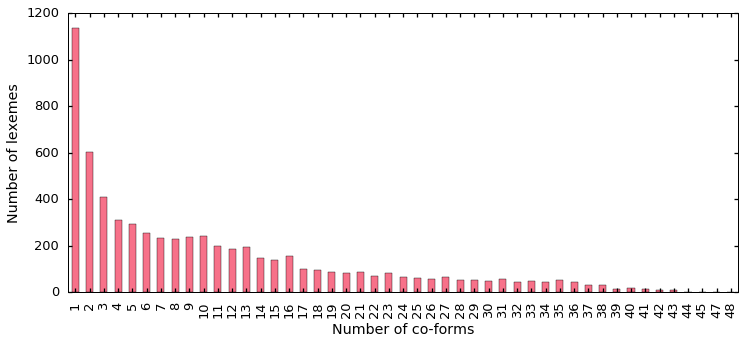

In [71]:
ax=flemme.groupby(by="nbSet")["nbSet"].count().plot(kind="bar",figsize=(12,5))
ax.set_xlabel("Number of co-forms")#,fontsize=16)
ax.set_ylabel("Number of lexemes")#,fontsize=16)
#ax.set_yscale("log")
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
plt.minorticks_off()
plt.savefig("Lex3-nbLexemesPerNbCoforms.png",dpi=300, bbox_inches="tight")

In [39]:
print len(flemme[flemme.index=="distraire"]["infover"].str.split(";").apply(set).values[0])

24


In [40]:
lex3[(lex3["4_cgram"]=="VER") & (lex3["3_lemme"]=="distraire")]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,lex3_11_infover
37707,distraie,distRE,distraire,VER,NaN,NaN,16.0,27.77,0.02,0.20,sub:pre:1s;sub:pre:3s;
37708,distraient,distRE,distraire,VER,NaN,NaN,16.0,27.77,0.37,0.27,ind:pre:3p;sub:pre:3p;
37709,distraies,distRE,distraire,VER,NaN,NaN,16.0,27.77,0.01,0.07,sub:pre:2s;
37710,distraira,distRERa,distraire,VER,NaN,NaN,16.0,27.77,0.41,0.34,ind:fut:3s;
37711,distrairaient,distRERE,distraire,VER,NaN,NaN,16.0,27.77,0.00,0.07,cnd:pre:3p;
37712,distrairait,distRERE,distraire,VER,NaN,NaN,16.0,27.77,0.05,0.41,cnd:pre:3s;
37713,distraire,distRER,distraire,VER,NaN,NaN,16.0,27.77,7.56,13.38,inf;;inf;;inf;;
37714,distrairont,distRER§,distraire,VER,NaN,NaN,16.0,27.77,0.01,0.07,ind:fut:3p;
37715,distrais,distRE,distraire,VER,NaN,NaN,16.0,27.77,0.76,0.20,imp:pre:2s;ind:pre:1s;ind:pre:2s;
37716,distrait,distRE,distraire,VER,m,s,16.0,27.77,4.45,6.76,ind:pre:3s;par:pas;


In [41]:
Lexique3[(Lexique3["4_cgram"]=="VER") & (Lexique3["3_lemme"]=="manger")]

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,...,26_orthrenv,27_phonrenv,28_orthosyll,29_cgramortho,30_deflem,31_defobs,32_old20,33_pld20,34_morphoder,35_nbmorph
79702,mange,m@Z,manger,VER,NaN,NaN,467.82,280.61,103.81,31.96,...,egnam,Z@m,man-ge,VER,100.0,20.0,1.00,1.00,manger,1
79707,mangea,m@Za,manger,VER,NaN,NaN,467.82,280.61,0.66,5.54,...,aegnam,aZ@m,man-gea,VER,100.0,20.0,1.55,1.05,manger,1
79710,mangeai,m@ZE,manger,VER,NaN,NaN,467.82,280.61,0.02,1.55,...,iaegnam,EZ@m,man-geai,VER,100.0,20.0,1.70,1.30,manger,1
79711,mangeaient,m@ZE,manger,VER,NaN,NaN,467.82,280.61,0.99,7.91,...,tneiaegnam,EZ@m,man-geaient,VER,100.0,20.0,1.90,1.30,manger,1
79714,mangeais,m@ZE,manger,VER,NaN,NaN,467.82,280.61,2.31,2.91,...,siaegnam,EZ@m,man-geais,VER,100.0,20.0,1.75,1.30,manger,1
79715,mangeait,m@ZE,manger,VER,NaN,NaN,467.82,280.61,4.93,20.14,...,tiaegnam,EZ@m,man-geait,VER,100.0,20.0,1.60,1.30,manger,1
79716,mangeant,m@Z@,manger,VER,NaN,NaN,467.82,280.61,3.13,7.57,...,tnaegnam,@Z@m,man-geant,VER,100.0,20.0,1.80,1.35,manger,1
79717,mangeas,m@Za,manger,VER,NaN,NaN,467.82,280.61,0.10,0.07,...,saegnam,aZ@m,man-geas,VER,100.0,20.0,1.70,1.05,manger,1
79718,mangeasse,m@Zas,manger,VER,NaN,NaN,467.82,280.61,0.00,0.07,...,essaegnam,saZ@m,man-geas-se,VER,100.0,20.0,2.75,1.80,manger,1
79719,mangent,m@Z,manger,VER,NaN,NaN,467.82,280.61,13.77,8.18,...,tnegnam,Z@m,man-gent,VER,100.0,20.0,1.75,1.00,manger,1


# Comparer les fréquences de Lexique3 avec Zipf
- découper les syncrétismes en cases
- converger vers la distribution de fréquences pour les syncrétismes
 - calculer la distribution moyenne
 - diviser la fréquence des syncrétismes en fonction de la moyenne
- tracer la courbe de fréquence pour les verbes

### Pour les films

In [42]:
lemmeFilm3=verb3[(verb3["7_freqlemfilms2"]!=0)][["3_lemme","1_ortho","7_freqlemfilms2"]]
lemmeFilm3.columns=["lemme","ortho","freq"]

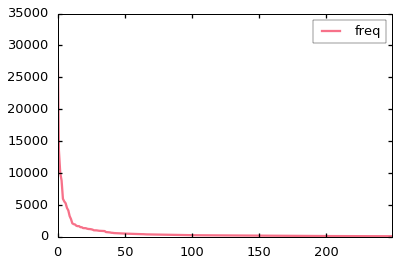

In [43]:
lemmeFilm3.groupby("lemme").first()["freq"].sort_values(ascending=False).reset_index()[:250].plot()

In [44]:
film3=verb3[(verb3["9_freqfilms2"]!=0)][["3_lemme","1_ortho","9_freqfilms2","infover"]]
film3.columns=["lemme","ortho","freq","cases"]

In [45]:
freqTableFilms=pd.pivot_table(film3, values='freq', index=['lemme'], columns=['cases'], aggfunc=lambda x: sum(x)).reset_index().reindex()

In [46]:
freqTableFilms.set_index("lemme")

cases,cnd:pre:1p;,cnd:pre:1s;,cnd:pre:1s;cnd:pre:2s;,cnd:pre:2p;,cnd:pre:2s;,cnd:pre:3p;,cnd:pre:3s;,imp:pre:1p;,imp:pre:1p;ind:imp:1p;ind:pre:1p;,imp:pre:1p;ind:pre:1p;,...,sub:imp:2s;,sub:imp:3p;,sub:imp:3s;,sub:pre:1p;,sub:pre:1s;,sub:pre:1s;sub:pre:3s;,sub:pre:2p;,sub:pre:2s;,sub:pre:3p;,sub:pre:3s;
lemme,,,,,,,,,,,,,,,,,,,,,
abaisser,NaN,NaN,0.13,NaN,NaN,0.01,0.02,0.02,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abandonner,0.01,NaN,0.93,0.23,NaN,0.02,0.23,NaN,NaN,1.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abasourdir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abattre,NaN,NaN,0.10,0.02,NaN,0.03,0.63,NaN,NaN,0.33,...,NaN,NaN,NaN,NaN,NaN,0.58,NaN,0.11,NaN,NaN
abdiquer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abhorrer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abjurer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abolir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abonder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
cellOrder=[c for c in freqTableFilms.columns[1:] if not ";" in c[:-1]]+[c for c in freqTableFilms.columns[1:] if ";" in c[:-1]]
cellOrder

[u'cnd:pre:1p;',
 u'cnd:pre:1s;',
 u'cnd:pre:2p;',
 u'cnd:pre:2s;',
 u'cnd:pre:3p;',
 u'cnd:pre:3s;',
 u'imp:pre:1p;',
 u'imp:pre:2p;',
 u'imp:pre:2s;',
 u'ind:fut:1p;',
 u'ind:fut:1s;',
 u'ind:fut:2p;',
 u'ind:fut:2s;',
 u'ind:fut:3p;',
 u'ind:fut:3s;',
 u'ind:imp:1p;',
 u'ind:imp:1s;',
 u'ind:imp:2p;',
 u'ind:imp:2s;',
 u'ind:imp:3p;',
 u'ind:imp:3s;',
 u'ind:pas:1p;',
 u'ind:pas:1s;',
 u'ind:pas:2p;',
 u'ind:pas:2s;',
 u'ind:pas:3p;',
 u'ind:pas:3s;',
 u'ind:pre:1p;',
 u'ind:pre:1s;',
 u'ind:pre:2p;',
 u'ind:pre:2s;',
 u'ind:pre:3p;',
 u'ind:pre:3s;',
 u'inf;',
 u'par:pas;',
 u'par:pre;',
 u'sub:imp:1p;',
 u'sub:imp:1s;',
 u'sub:imp:2p;',
 u'sub:imp:2s;',
 u'sub:imp:3p;',
 u'sub:imp:3s;',
 u'sub:pre:1p;',
 u'sub:pre:1s;',
 u'sub:pre:2p;',
 u'sub:pre:2s;',
 u'sub:pre:3p;',
 u'sub:pre:3s;',
 u'cnd:pre:1s;cnd:pre:2s;',
 u'imp:pre:1p;ind:imp:1p;ind:pre:1p;',
 u'imp:pre:1p;ind:pre:1p;',
 u'imp:pre:1p;ind:pre:1p;inf;',
 u'imp:pre:1p;ind:pre:1p;sub:pre:2s;',
 u'imp:pre:1p;sub:pre:1p;',
 u'

In [48]:
freqTableFilms=freqTableFilms.reindex_axis(["lemme"]+cellOrder, axis=1)

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


In [49]:
freqTableFilms.columns=[c.strip(";") for c in freqTableFilms.columns]

In [50]:
simplesCases=freqTableFilms.sum()[1:52]
multiplesCases=freqTableFilms.sum()[52:]
refFreq=simplesCases.copy()


In [51]:
convergence=0.0000000001
boolConvergence=False
while not boolConvergence:
    curFreq=simplesCases.copy()
    for m in multiplesCases.keys():
        mCases=[c for c in m.strip(";").split(";")]
        mTotal=0
        for case in mCases:
            mTotal+=refFreq[case]
        for case in mCases:
            partCase=refFreq[case]/mTotal*multiplesCases[m]
    #        print partCase,
            curFreq[case]+=partCase
    #    print
    boolFin=True
    for case in refFreq.keys():
        if math.fabs(refFreq[case]-curFreq[case])/refFreq[case]>convergence:
            print case, refFreq[case],curFreq[case]
            boolFin=False
    #        break
    refFreq=curFreq.copy()
    if boolFin:
        boolConvergence=True
refFreqFilms=refFreq

imp:pre:1p 8.57 26.4171350451
imp:pre:2p 83.77 779.031154601
imp:pre:2s 1.98 59.4812236146
ind:fut:2s 777.85 792.872430464
ind:fut:3p 439.54 456.207292219
ind:fut:3s 2746.31 2777.59770448
ind:imp:1p 186.06 205.624187548
ind:imp:1s 23.29 3524.8661178
ind:imp:2p 390.27 567.765148422
ind:imp:2s 0.65 98.3753961601
ind:imp:3p 500.07 522.150857091
ind:imp:3s 5678.29 5790.7400657
ind:pas:1s 39.47 102.864802434
ind:pas:2s 10.23 26.3179446791
ind:pas:3p 81.23 81.3279404439
ind:pas:3s 549.1 585.408198038
ind:pre:1p 380.22 588.292812067
ind:pre:1s 4269.23 17080.2608019
ind:pre:2p 1446.42 11695.3067159
ind:pre:2s 3892.51 14552.1979853
ind:pre:3p 4388.51 5437.96010213
ind:pre:3s 32875.82 58124.6462301
inf 31556.43 34970.6349969
par:pas 22728.85 27697.2221987
sub:imp:1s 1.73 1.86456555202
sub:imp:3p 0.86 0.860574068716
sub:pre:1p 9.09 24.6784838253
sub:pre:1s 0.34 10.0886929404
sub:pre:2p 26.11 70.4132434599
sub:pre:2s 200.58 594.007024495
sub:pre:3p 75.54 93.5292123568
sub:pre:3s 408.8 1426.3587615

ind:fut:2s 792.551309664 792.55130264
ind:fut:3p 451.264509942 451.264912549
ind:fut:3s 2777.25235655 2777.25234606
ind:imp:1p 204.603255932 204.604890455
ind:imp:1s 3525.78335077 3525.77842044
ind:imp:2p 566.060119274 566.073048474
ind:imp:2s 98.400995191 98.4008575907
ind:imp:3p 518.914867496 518.914872899
ind:imp:3s 5782.7191571 5782.71562695
ind:pas:1s 103.034492119 103.033763751
ind:pas:2s 27.9631187895 27.9634172485
ind:pas:3p 81.3239664121 81.3239662741
ind:pas:3s 576.424944708 576.425767353
ind:pre:1p 538.613701766 538.891153223
ind:pre:1s 22845.4664702 22838.8440964
ind:pre:2p 11551.1137909 11544.5168917
ind:pre:2s 12692.4362061 12690.9673104
ind:pre:3p 5440.90343035 5440.90341492
ind:pre:3s 54606.5072049 54604.2190954
inf 34124.4407981 34124.4695062
par:pas 26960.7179632 26960.6504947
sub:imp:1s 1.78584083089 1.78584005777
sub:pre:1p 21.7911151666 21.7746816625
sub:pre:1s 22.8482672542 21.0626962499
sub:pre:2p 43.6836008553 43.646621708
sub:pre:2s 474.804693239 473.44849436
s

ind:imp:1s 3525.75097695 3525.75049299
ind:imp:2p 566.140539869 566.141587746
ind:imp:2s 98.4000916709 98.4000781641
ind:imp:3p 518.914904379 518.914904942
ind:imp:3s 5782.69625418 5782.69594232
ind:pas:1s 103.030114771 103.030052067
ind:pas:2s 27.9646923036 27.9647120017
ind:pas:3p 81.3239655166 81.3239655032
ind:pas:3s 576.430334694 576.430416599
ind:pre:1p 540.265955515 540.285916085
ind:pre:1s 22800.6781682 22799.9965351
ind:pre:2p 11508.2426576 11507.6540164
ind:pre:2s 12682.8130567 12682.6605741
ind:pre:3p 5440.90333888 5440.9033378
ind:pre:3s 54591.4013679 54591.1685257
inf 34124.6247599 34124.6265954
par:pas 26960.2610099 26960.2539804
sub:imp:1s 1.7858369633 1.7858369171
sub:pre:1p 21.6962294379 21.6951803968
sub:pre:1s 6.98008057648 6.59956335746
sub:pre:2p 43.4521488017 43.4491105079
sub:pre:2s 466.721324485 466.622541863
sub:pre:3s 1518.54620563 1518.80288541
imp:pre:1p 36.3078014212 36.3101109485
imp:pre:2p 1501.09831579 1501.59919612
imp:pre:2s 920.701566209 921.823203447

ind:pre:3s 54589.6896079 54589.6617861
inf 34124.6315857 34124.6314333
par:pas 26960.2096947 26960.2088702
sub:imp:1s 1.78583662872 1.78583662342
sub:pre:1p 21.6893679557 21.6892801761
sub:pre:1s 3.85026021073 3.78984935268
sub:pre:2p 43.4322105041 43.4319793929
sub:pre:2s 466.048314335 466.038865809
sub:pre:3s 1520.69429856 1520.73666838
imp:pre:1p 36.3232505595 36.3234588133
imp:pre:2p 1504.39606076 1504.43443558
imp:pre:2s 928.967578406 929.102545561
ind:fut:3p 451.267447543 451.267451731
ind:imp:1p 204.613316093 204.613323362
ind:imp:1s 3525.74740192 3525.7473521
ind:imp:2p 566.147492395 566.147560838
ind:imp:2s 98.3999918955 98.3999905051
ind:imp:3p 518.914908531 518.914908588
ind:imp:3s 5782.69419556 5782.69417595
ind:pas:1s 103.029647471 103.02964085
ind:pas:2s 27.9648369901 27.9648389864
ind:pas:3s 576.430942944 576.430951492
ind:pre:1p 540.402861793 540.404503916
ind:pre:1s 22795.6650798 22795.5959357
ind:pre:2p 11504.3220289 11504.2832592
ind:pre:2s 12681.6554729 12681.638537

sub:imp:1s 1.78583658909 1.78583658816
sub:pre:1p 21.6887466968 21.6887333025
sub:pre:1s 3.37981689741 3.36808817985
sub:pre:2p 43.4307338769 43.4307099386
sub:pre:2s 465.979695302 465.97815123
sub:pre:3s 1521.02546327 1521.03376
imp:pre:1p 36.3247464435 36.3247795071
imp:pre:2p 1504.64130476 1504.64528161
imp:pre:2s 929.983879704 930.008048727
ind:fut:3p 451.267479046 451.267479794
ind:imp:1p 204.613367535 204.613368644
ind:imp:1s 3525.7470278 3525.74701894
ind:imp:2p 566.147929695 566.147936784
ind:imp:2s 98.3999814543 98.399981207
ind:imp:3s 5782.69407305 5782.6940712
ind:pas:1s 103.029597582 103.029596394
ind:pas:2s 27.9648519491 27.9648523022
ind:pas:3s 576.431007234 576.43100876
ind:pre:1p 540.414786737 540.415055038
ind:pre:1s 22795.1471958 22795.134977
ind:pre:2p 11504.0742769 11504.0702602
ind:pre:2s 12681.5270434 12681.5239575
ind:pre:3s 54589.4753708 54589.4709301
inf 34124.6296179 34124.6295472
par:pas 26960.2033593 26960.2032283
sub:imp:1s 1.78583658816 1.78583658732
sub:p

sub:pre:3s 1521.0944274 1521.09558793
imp:pre:1p 36.3250122004 36.3250164654
imp:pre:2p 1504.66778913 1504.66805094
imp:pre:2s 930.182121033 930.185396415
ind:fut:3p 451.267485177 451.267485278
ind:imp:1p 204.613376384 204.613376524
ind:imp:1s 3525.74695519 3525.746954
ind:imp:2p 566.147976906 566.147977373
ind:imp:2s 98.3999794279 98.3999793945
ind:pas:1s 103.029587838 103.029587677
ind:pas:2s 27.9648548404 27.964854888
ind:pas:3s 576.431019745 576.431019952
ind:pre:1p 540.416954304 540.416989351
ind:pre:1s 22795.0471875 22795.0455402
ind:pre:2p 11504.047531 11504.0472667
ind:pre:2s 12681.5016624 12681.5012414
ind:pre:3s 54589.4389305 54589.438328
inf 34124.6289475 34124.6289338
par:pas 26960.2022845 26960.2022667
sub:pre:1p 21.6886381279 21.6886366111
sub:pre:1s 3.28080532823 3.27933894607
sub:pre:2p 43.430572882 43.4305715272
sub:pre:2s 465.967018609 465.966838102
sub:pre:3s 1521.09558793 1521.0966282
imp:pre:1p 36.3250164654 36.3250202806
imp:pre:2p 1504.66805094 1504.66827602
imp:

imp:pre:2s 930.208153894 930.208718385
ind:imp:1p 204.613377492 204.613377516
ind:pas:1s 103.029586558 103.029586531
ind:pas:2s 27.9648552188 27.964855227
ind:pre:1p 540.417231802 540.417237788
ind:pre:1s 22795.0341011 22795.0338175
ind:pre:2p 11504.0458156 11504.0457921
ind:pre:2s 12681.4983142 12681.4982415
ind:pre:3s 54589.4341416 54589.4340378
par:pas 26960.2021432 26960.2021402
sub:pre:1p 21.6886261488 21.6886258913
sub:pre:1s 3.26911691448 3.26886247333
sub:pre:2p 43.4305640846 43.4305639639
sub:pre:2s 465.965588662 465.965557795
sub:pre:3s 1521.10388196 1521.10406257
imp:pre:1p 36.3250466509 36.3250473014
imp:pre:2p 1504.66951238 1504.66953242
imp:pre:2s 930.208718385 930.209224238
ind:imp:1p 204.613377516 204.613377537
ind:pas:1s 103.029586531 103.029586506
ind:pas:2s 27.964855227 27.9648552344
ind:pre:1p 540.417237788 540.41724315
ind:pre:1s 22795.0338175 22795.0335634
ind:pre:2p 11504.0457921 11504.0457719
ind:pre:2s 12681.4982415 12681.4981764
ind:pre:3s 54589.4340378 54589.

imp:pre:2p 1504.66964917 1504.66965001
imp:pre:2s 930.213103321 930.213153986
ind:pre:1p 540.41728422 540.417284756
ind:pre:1s 22795.0316153 22795.0315899
ind:pre:2s 12681.4976769 12681.4976704
ind:pre:3s 54589.433231 54589.4332216
sub:pre:1p 21.688623896 21.6886238731
sub:pre:1s 3.26688388919 3.26686100097
sub:pre:2s 465.965318319 465.965315556
sub:pre:3s 1521.10546716 1521.10548341
imp:pre:1p 36.3250523454 36.3250524036
imp:pre:2p 1504.66965001 1504.66965072
imp:pre:2s 930.213153986 930.213199395
ind:pre:1p 540.417284756 540.417285236
ind:pre:1s 22795.0315899 22795.0315671
ind:pre:2s 12681.4976704 12681.4976645
ind:pre:3s 54589.4332216 54589.4332133
sub:pre:1p 21.6886238731 21.6886238525
sub:pre:1s 3.26686100097 3.26684048619
sub:pre:2s 465.965315556 465.96531308
sub:pre:3s 1521.10548341 1521.10549798
imp:pre:1p 36.3250524036 36.3250524557
imp:pre:2p 1504.66965072 1504.66965134
imp:pre:2s 930.213199395 930.213240095
ind:pre:1p 540.417285236 540.417285666
ind:pre:1s 22795.0315671 2279

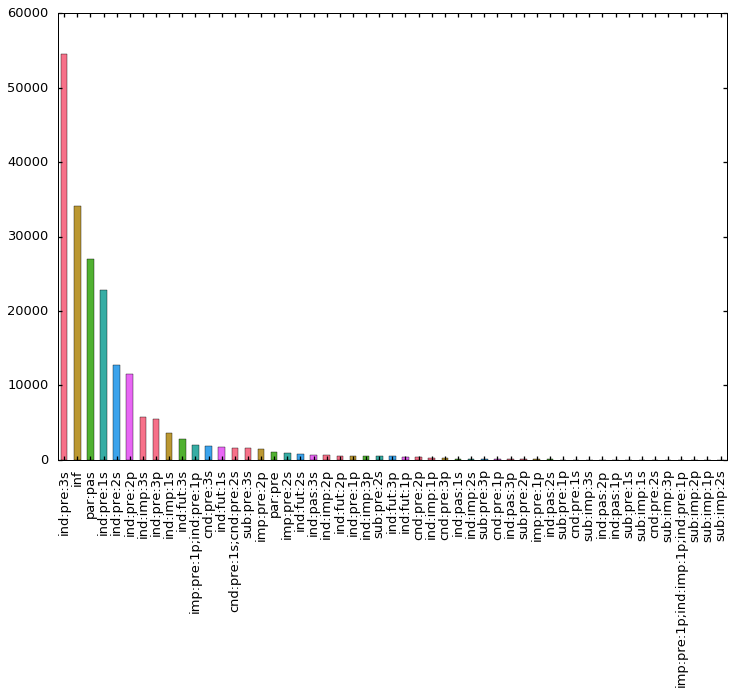

In [52]:
refFreqFilms.sort_values(ascending=False).plot(kind="bar",figsize=(12,8))

### Pour Frantext

In [53]:
lemmeFrantext3=verb3[(verb3["8_freqlemlivres"]!=0)][["3_lemme","1_ortho","8_freqlemlivres"]]
lemmeFrantext3.columns=["lemme","ortho","freq"]

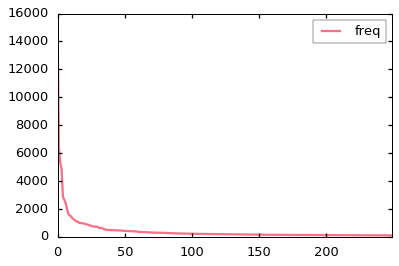

In [54]:
lemmeFrantext3.groupby("lemme").first()["freq"].sort_values(ascending=False).reset_index()[:250].plot()

In [ ]:
frantext3=verb3[(verb3["10_freqlivres"]!=0)][["3_lemme","1_ortho","10_freqlivres","infover"]]
frantext3.columns=["lemme","ortho","freq","cases"]

In [ ]:
freqTableTexte=pd.pivot_table(frantext3, values='freq', index=['lemme'], columns=['cases'], aggfunc=lambda x: sum(x)).reset_index().reindex()

In [ ]:
freqTableTexte.set_index("lemme")

In [ ]:
cellOrder=[c for c in freqTableTexte.columns[1:] if not ";" in c[:-1]]+[c for c in freqTableTexte.columns[1:] if ";" in c[:-1]]
cellOrder

In [ ]:
freqTableTexte=freqTableTexte.reindex_axis(["lemme"]+cellOrder, axis=1)

In [ ]:
freqTableTexte.columns=[c.strip(";") for c in freqTableTexte.columns]

In [ ]:
simplesCases=freqTableTexte.sum()[1:52]
multiplesCases=freqTableTexte.sum()[52:]
refFreq=simplesCases.copy()

In [ ]:
convergence=0.0000000001
boolConvergence=False
while not boolConvergence:
    curFreq=simplesCases.copy()
    for m in multiplesCases.keys():
        mCases=[c for c in m.strip(";").split(";")]
        mTotal=0
        for case in mCases:
            mTotal+=refFreq[case]
        for case in mCases:
            partCase=refFreq[case]/mTotal*multiplesCases[m]
    #        print partCase,
            curFreq[case]+=partCase
    #    print
    boolFin=True
    for case in refFreq.keys():
        if math.fabs(refFreq[case]-curFreq[case])/refFreq[case]>convergence:
            print case, refFreq[case],curFreq[case]
            boolFin=False
    #        break
    refFreq=curFreq.copy()
    if boolFin:
        boolConvergence=True
refFreqTexte=refFreq

In [ ]:
refFrequencies=pd.DataFrame(refFreqFilms,columns=["films"])
refFrequencies["textes"]=refFreqTexte

In [ ]:
refFrequencies

In [ ]:
refFrequencies.to_csv(path_or_buf=nomRepertoire+"Verbes3-FrequencesCases.csv",
                      encoding="utf8",sep="\t")

In [ ]:
"""https://github.com/cognoma/genes/blob/721204091a96e55de6dcad165d6d8265e67e2a48/2.process.py#L61-L95"""

def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.
    
    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row
    
    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [ ]:
film3["case"]=film3["cases"].str[:-1]

In [ ]:
splitFilm3=tidy_split(film3, "case", sep=';', keep=False)
splitFilm3

In [ ]:
def relativeFreqs(case,cases):
    totalFreq=sum([refFreq[c] for c in cases])
    result={}
    for c in cases:
        result[c]=float(refFreq[c])/totalFreq
#    print result,result[case]
    return result[case]

def repartitionFreqCases(row):
    cases=row["cases"][:-1].split(";")
    case=row["case"]
#    print case
    if len(cases)>1:
        relFreqCase=relativeFreqs(case,cases)
        return relFreqCase*row["freq"]
    else:
        return row["freq"]

In [ ]:
splitFilm3["relFreq"]=splitFilm3.apply(repartitionFreqCases,axis=1)

In [ ]:
zipfFilm3=splitFilm3["relFreq"].sort_values(ascending=False).reset_index()
zipfFilm3["Verbs Lex3 FxR"]=zipfFilm3["relFreq"]*(zipfFilm3.index+1)
zipfConst=zipfFilm3["Verbs Lex3 FxR"].mean()
#zipfFilm3["FR1"]=zipfFilm3["relFreq"]*(zipfFilm3.index+1)
#zipfFilm3["FR2"]=zipfFilm3["relFreq"]*np.log(zipfFilm3.index+1)*zipfConst

In [ ]:
splitFilm3["relFreq"].sort_values(ascending=False).reset_index()["relFreq"][:100].plot(figsize=(20,5))

In [ ]:
zipfFilm3["Zipf Law FxR"]=zipfConst
ax=zipfFilm3[["Verbs Lex3 FxR","Zipf Law FxR"]].plot(figsize=(10,5),title="Verb forms in Lexique3\nZipf Law vs Actual Distribution")
ax.set_xlabel("Rank",fontsize=16)
ax.set_ylabel("Frequency*Rank",fontsize=16)

In [ ]:
Lexique3[Lexique3["9_freqfilms2"]!=0]["9_freqfilms2"].sort_values(ascending=False).reset_index()["9_freqfilms2"].plot()

In [ ]:
Lexique3["relFreq"]=Lexique3["9_freqfilms2"]
zipfLexique3=Lexique3["relFreq"].sort_values(ascending=False).reset_index()
zipfLexique3["Lexique3"]=zipfLexique3["relFreq"]*(zipfLexique3.index+1)
zipfConst=zipfLexique3["Lexique3"].mean()
zipfLexique3["Zipf Law"]=zipfConst
ax=zipfLexique3[["Lexique3","Zipf Law"]][:100000].plot(figsize=(10,5))
ax.set(xlim=(0,100000),ylim=(0,100000))
ax.set_xlabel("Rank",fontsize=16)
ax.set_ylabel("Frequency x Rank",fontsize=16)

# Calcul pour émergence-convergence (Morphology17)
## Intégration des -able dans Verbes3

In [55]:
nomVerbes3="/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/MGC-171229-Verbes3.pkl"
with open(nomVerbes3,"rb") as input:
    verbes3=pickle.load(input)

ImportError: No module named indexes.base

In [56]:
nomVerbes3="/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/MGC-171229-Verbes3.pkl"
verbes3=pd.read_pickle(nomVerbes3)


In [57]:
lstVerbes3=list(set(verbes3["lexeme"].tolist()))

In [59]:
dfVerbes3Join=verbes3.loc[verbes3["freq"]>10000,["lexeme","case","ortho"]]

In [90]:
dfVerbes3Coformes=dfVerbes3Join.groupby("lexeme").count()
min2Verbes3=dfVerbes3Coformes[dfVerbes3Coformes["case"]>1].index.tolist()
min2Verbes3

[u'abaisser',
 u'abandonner',
 u'abasourdir',
 u'abattre',
 u'abdiquer',
 u'abhorrer',
 u'abjurer',
 u'abolir',
 u'abonder',
 u'abonner',
 u'aborder',
 u'aboucher',
 u'abouler',
 u'abouter',
 u'aboutir',
 u'aboyer',
 u'abreuver',
 u'abriter',
 u'abroger',
 u'abrutir',
 u'abr\xe9ger',
 u'absenter',
 u'absorber',
 u'absoudre',
 u'abstenir',
 u'abstraire',
 u'abuser',
 u'ab\xe2tardir',
 u'ab\xeatir',
 u'ab\xeemer',
 u'acagnarder',
 u'accabler',
 u'accaparer',
 u'accentuer',
 u'accepter',
 u'accidenter',
 u'acclamer',
 u'acclimater',
 u'accointer',
 u'accoler',
 u'accommoder',
 u'accompagner',
 u'accomplir',
 u'accorder',
 u'accoster',
 u'accoter',
 u'accoucher',
 u'accouder',
 u'accoupler',
 u'accourir',
 u'accoutrer',
 u'accoutumer',
 u'accrocher',
 u'accroupir',
 u'accro\xeetre',
 u'accr\xe9diter',
 u'accueillir',
 u'acculer',
 u'accumuler',
 u'accuser',
 u'acc\xe9der',
 u'acc\xe9l\xe9rer',
 u'achalander',
 u'acharner',
 u'acheminer',
 u'acheter',
 u'achever',
 u'achopper',
 u'aciduler'

In [61]:
dfAble=Lexique3[(Lexique3["4_cgram"]=="ADJ") & (Lexique3["3_lemme"].str.endswith("ble"))][["1_ortho","3_lemme","5_genre","6_nombre","9_freqfilms2","10_freqlivres"]]

In [62]:
dfAble["5_genre"]=dfAble["5_genre"].fillna(value="mf")

In [63]:
dfAble["freq"]=dfAble["9_freqfilms2"]+dfAble["10_freqlivres"]
dfAble["case"]=dfAble["5_genre"]+dfAble["6_nombre"]

In [64]:
sAble=dfAble.groupby("3_lemme")["freq"].sum()

In [65]:
sAble[sAble.index.str.endswith('uble')].sort_values(ascending=False)

3_lemme
double          89.45
trouble         20.32
meuble           3.35
insoluble        2.85
immeuble         2.43
indissoluble     1.08
soluble          0.75
résoluble        0.03
Name: freq, dtype: float64

In [66]:
dfVAble=sAble.to_frame(name="freq")

In [67]:
dfVAble["verbe"]=dfVAble.index.str[:-4]+"er"

In [68]:
if saveFiles: dfVAble.to_csv(path_or_buf="TEMP.csv",encoding="utf8",sep=";")

NameError: name 'saveFiles' is not defined

In [31]:
if saveFiles: dfVAble=pd.DataFrame.from_csv(path="TEMP.csv",encoding="utf8",sep=";")

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


IOError: File TEMP.csv does not exist

In [69]:
dfVAbleJoin=dfVAble.reset_index()

In [70]:
dfVAbleJoin.columns=["ortho","freq","lexeme"]

In [71]:
dfVAbleJoin["case"]=u"=> able"
dfVAbleJoin

,ortho,freq,lexeme,case
0,abominable,16.62,abominer,=> able
1,abordable,0.67,aborder,=> able
2,absorbable,0.07,absorber,=> able
3,acceptable,8.36,accepter,=> able
4,accessible,7.80,accesser,=> able
5,achetable,0.14,acheter,=> able
6,adaptable,0.30,adapter,=> able
7,admirable,38.07,admirer,=> able
8,admissible,1.10,admisser,=> able
9,adoptable,0.07,adopter,=> able


In [115]:
ableDerif=[u"consommable",u"charriable",u"contraignable",u"transférable",u"tenable",u"rétorquable",u"recevable",u"navigable",u"remplaçable",u"avouable",u"remuable",u"détectable",u"considérable",u"applicable",u"restituable",u"amortissable",u"portable",u"détestable",u"digérable",u"intégrable",u"fertilisable",u"abominable",u"défroissable",u"saturable",u"prononçable",u"viciable",u"résiliable",u"communicable",u"définissable",u"tarissable",u"aménageable",u"sociable",u"accordable",u"ouvrable",u"inculpable",u"potable",u"réparable",u"pénétrable",u"condamnable",u"réfutable",u"remboursable",u"patentable",u"enfichable",u"niable",u"soudable",u"augmentable",u"souhaitable",u"amnistiable",u"retirable",u"labourable",u"discutable",u"endurable",u"regrettable",u"distinguable",u"largable",u"écoutable",u"fatigable",u"panifiable",u"achevable",u"exécrable",u"supportable",u"séparable",u"réformable",u"commuable",u"mettable",u"protestable",u"coprimable",u"expiable",u"justifiable",u"distribuable",u"convenable",u"rétractable",u"mutable",u"chiffrable",u"valable",u"praticable",u"imaginable",u"inflammable",u"convocable",u"conciliable",u"détachable",u"froissable",u"dispensable",u"tolérable",u"sécable",u"quantifiable",u"redoutable",u"faisable",u"superposable",u"polymérisable",u"malléable",u"admirable",u"peccable",u"influençable",u"déterminable",u"renversable",u"irrigable",u"controversable",u"recommandable",u"enviable",u"utilisable",u"jouable",u"datable",u"transportable",u"percevable",u"accostable",u"représentable",u"électrolysable",u"oubliable",u"repliable",u"commercialisable",u"buvable",u"éducable",u"secourable",u"apprivoisable",u"acclimatable",u"transplantable",u"réadaptable",u"perdable",u"épuisable",u"remaniable",u"honorable",u"volable",u"salifiable",u"lavable",u"arable",u"modulable",u"trouvable",u"maîtrisable",u"proposable",u"juxtaposable",u"acidifiable",u"consultable",u"punissable",u"cristallisable",u"attirable",u"localisable",u"saponifiable",u"méconnaissable",u"sciable",u"discernable",u"durable",u"retouchable",u"périssable",u"lamentable",u"excitable",u"vaccinable",u"programmable",u"filable",u"négligeable",u"aliénable",u"sublimable",u"taxable",u"mangeable",u"cyclable",u"haïssable",u"confortable",u"bancable",u"métamorphosable",u"canalisable",u"irisable",u"canonisable",u"crochetable",u"raccommodable",u"gagnable",u"morcelable",u"habitable",u"privatisable",u"excusable",u"clivable",u"réintégrable",u"préférable",u"pulvérisable",u"déclinable",u"supprimable",u"réglable",u"amendable",u"dissécable",u"arbitrable",u"contestable",u"améliorable",u"guéable",u"prenable",u"respirable",u"attaquable",u"multipliable",u"connaissable",u"récupérable",u"désirable",u"rechargeable",u"décidable",u"putréfiable",u"retrouvable",u"concevable",u"vérifiable",u"échangeable",u"mariable",u"calculable",u"relevable",u"friable",u"arrangeable",u"hypothécable",u"dévitrifiable",u"opérable",u"commensurable",u"banquable",u"inoculable",u"envisageable",u"rémunérable",u"adoptable",u"exécutable",u"vitrifiable",u"développable",u"approuvable",u"révisable",u"critiquable",u"réalisable",u"changeable",u"annulable",u"préjudiciable",u"rachetable",u"dialysable",u"probable",u"hydratable",u"accentuable",u"gonflable",u"sable",u"assimilable",u"limitable",u"transmutable",u"imitable",u"comparable",u"satellisable",u"évitable",u"interchangeable",u"observable",u"évocable",u"tractable",u"industrialisable",u"estimable",u"livrable",u"soutenable",u"vivable",u"étirable",u"incorporable",u"perméable",u"guérissable",u"orientable",u"approchable",u"skiable",u"maniable",u"remédiable",u"testable",u"partageable",u"quérable",u"aimable",u"inondable",u"polarisable",u"devinable",u"appréciable",u"exprimable",u"adaptable",u"gérable",u"prouvable",u"arrosable",u"saisissable",u"sortable",u"méprisable",u"reconnaissable",u"identifiable",u"altérable",u"triturable",u"flottable",u"entraînable",u"mesurable",u"transmuable",u"absorbable",u"déplorable",u"filtrable",u"exportable",u"justiciable",u"émotionnable",u"délectable",u"simplifiable",u"rectifiable",u"jetable",u"taillable",u"dédaignable",u"émulsifiable",u"brevetable",u"palpable",u"louable",u"incriminable",u"qualifiable",u"destituable",u"employable",u"vénérable",u"explicable",u"fréquentable",u"censurable",u"croyable",u"cultivable",u"démontable",u"irritable",u"rescindable",u"pendable",u"profitable",u"pétrissable",u"opposable",u"abordable",u"solvable",u"pensable",u"dissociable",u"assignable",u"fiable",u"attribuable",u"impressionnable",u"vulnérable",u"soupçonnable",u"distillable",u"passable",u"décomposable",u"analysable",u"contrôlable",u"imprimable",u"abrogeable",u"logeable",u"fermentable",u"renouvelable",u"dévissable",u"vendable",u"exploitable",u"permutable",u"repérable",u"démobilisable",u"alcoolisable",u"montrable",u"récusable",u"démontrable",u"enregistrable",u"inclinable",u"adorable",u"formulable",u"blâmable",u"civilisable",u"déchiffrable",u"serviable",u"raisonnable",u"présentable",u"mobilisable",u"égalable",u"ployable",u"franchissable",u"décapotable",u"interprétable",u"transposable",u"évaluable",u"respectable",u"refusable",u"recomposable",u"perdurable",u"tuable",u"jugeable",u"dansable",u"achetable",u"révocable",u"fumable",u"négociable",u"généralisable",u"transformable",u"présumable",u"manoeuvrable",u"dénombrable",u"coagulable",u"payable",u"reprochable",u"rejetable",u"rapportable",u"bannissable",u"escamotable",u"récoltable",u"racontable",u"informatisable",u"classable",u"capitalisable",u"disputable",u"imputable",u"déformable",u"effaçable",u"débitable",u"intimidable",u"défendable",u"acceptable",u"pondérable",u"dilatable",u"damnable",u"écrasable",u"remarquable",u"confiscable",u"congédiable",u"conjugable",u"insérable",u"pardonnable",u"dirigeable"]
dfVAbleJoinDerif=dfVAbleJoin[dfVAbleJoin["ortho"].isin(ableDerif)]

In [116]:
dfForms=dfVerbes3Join.append(dfVAbleJoin).reset_index(drop=True)
dfForms=dfVerbes3Join.append(dfVAbleJoinDerif).reset_index(drop=True)

In [117]:
dfParadigmes=dfForms.pivot_table(values='ortho', index=['lexeme'], columns=['case'], aggfunc=lambda x: ",".join(x)).reset_index().reindex()

In [119]:
dfParadigmes.set_index("lexeme")

case,=> able,ai1P,ai1S,ai2P,ai2S,ai3P,ai3S,fi1P,fi1S,fi2P,...,ppFP,ppFS,ppMP,ppMS,ps1P,ps1S,ps2P,ps2S,ps3P,ps3S
lexeme,,,,,,,,,,,,,,,,,,,,,
abaisser,NaN,NaN,abaissai,NaN,NaN,abaissèrent,abaissa,NaN,abaisserai,NaN,...,abaissées,abaissée,abaissés,abaissé,NaN,NaN,NaN,NaN,NaN,NaN
abandonner,NaN,abandonnâmes,abandonnai,NaN,abandonnas,abandonnèrent,abandonna,abandonnerons,abandonnerai,abandonnerez,...,abandonnées,abandonnée,abandonnés,abandonné,NaN,NaN,NaN,abandonnes,abandonnent,abandonne
abasourdir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,abasourdie,abasourdis,abasourdi,NaN,NaN,NaN,NaN,NaN,NaN
abattre,NaN,NaN,abattis,NaN,NaN,abattirent,abattit,abattrons,abattrai,abattrez,...,abattues,abattue,abattus,abattu,NaN,abatte,NaN,abattes,NaN,abatte
abdiquer,NaN,NaN,abdiquai,NaN,NaN,NaN,abdiqua,NaN,NaN,NaN,...,NaN,abdiquée,NaN,abdiqué,NaN,NaN,NaN,NaN,NaN,NaN
aberrer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abhorrer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,abhorrée,abhorrés,abhorré,NaN,NaN,NaN,NaN,NaN,NaN
abjurer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,abjuré,NaN,NaN,NaN,NaN,NaN,NaN
abolir,NaN,NaN,NaN,NaN,NaN,NaN,abolit,NaN,NaN,NaN,...,abolies,abolie,abolis,aboli,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
def tableauPaires(paradigme):
    table=pd.DataFrame(columns=["ligne","colonne","nbPaires"])
    refCases=paradigme.columns.tolist()
    refCases.remove("lexeme")
    for n,paire in enumerate(it.combinations_with_replacement(refCases,2)):
        if paire[0] in paradigme.columns and paire[1] in paradigme.columns:
            nbPaires=len(paradigme[[paire[0],paire[1]]].dropna())
        else:
            nbPaires=0
        table.loc[2*n]=[paire[0],paire[1],nbPaires]
        table.loc[2*n+1]=[paire[1],paire[0],nbPaires]
    table["nbPaires"]=table["nbPaires"].astype(int)
    tableau=table.pivot_table(index="ligne",columns=["colonne"])
    return tableau

In [121]:
def sortCellFrequency(df):
    return pd.Series(np.diag(df),index=df.index).sort_values(ascending=False).index.tolist()

In [122]:
df=tableauPaires(dfParadigmes)["nbPaires"]

In [123]:
np.diag(df).sum()

73682

In [124]:
def heatmap(df):
    fig, ax = plt.subplots(figsize=(60,50))
#    ax.set_ylabel('Cells sorted by decreasing frequency')    
#    ax.set_xlabel('Cells sorted by decreasing frequency')
    sns.heatmap(df,cmap="Oranges",norm=norm,annot=True,fmt="g",cbar_kws={"ticks":bounds},ax=ax,cbar=True)
    return

In [125]:
#bounds = np.array([0, 3, 10, 30, 100, 300, 1000, 3000, 5000])
bounds = np.array([0,30,300,2000,5000])
norm = mplt.colors.BoundaryNorm(boundaries=bounds, ncolors=100)

[u'inf', u'ppMS', u'pi3S', u'ii3S', u'ppFS', u'pP', u'ppMP', u'pi3P', u'pi1S', u'ii3P', u'ai3S', u'ppFP', u'pI2S', u'pI2P', u'pi2P', u'ii1S', u'pi2S', u'fi3S', u'pc3S', u'ai3P', u'pi1P', u'fi1S', u'ai1S', u'pI1P', u'fi3P', u'ii2S', u'pc1S', u'ii1P', u'is3S', u'pc3P', u'ii2P', u'fi2P', u'fi2S', u'fi1P', u'ps3S', u'pc2S', u'ps2S', u'ps1S', u'ai1P', u'pc2P', u'=> able', u'pc1P', u'is3P', u'ai2S', u'ps3P', u'is1S', u'ps2P', u'ps1P', u'ai2P', u'is2S', u'is1P', u'is2P']


NameError: name 'saveFiles' is not defined

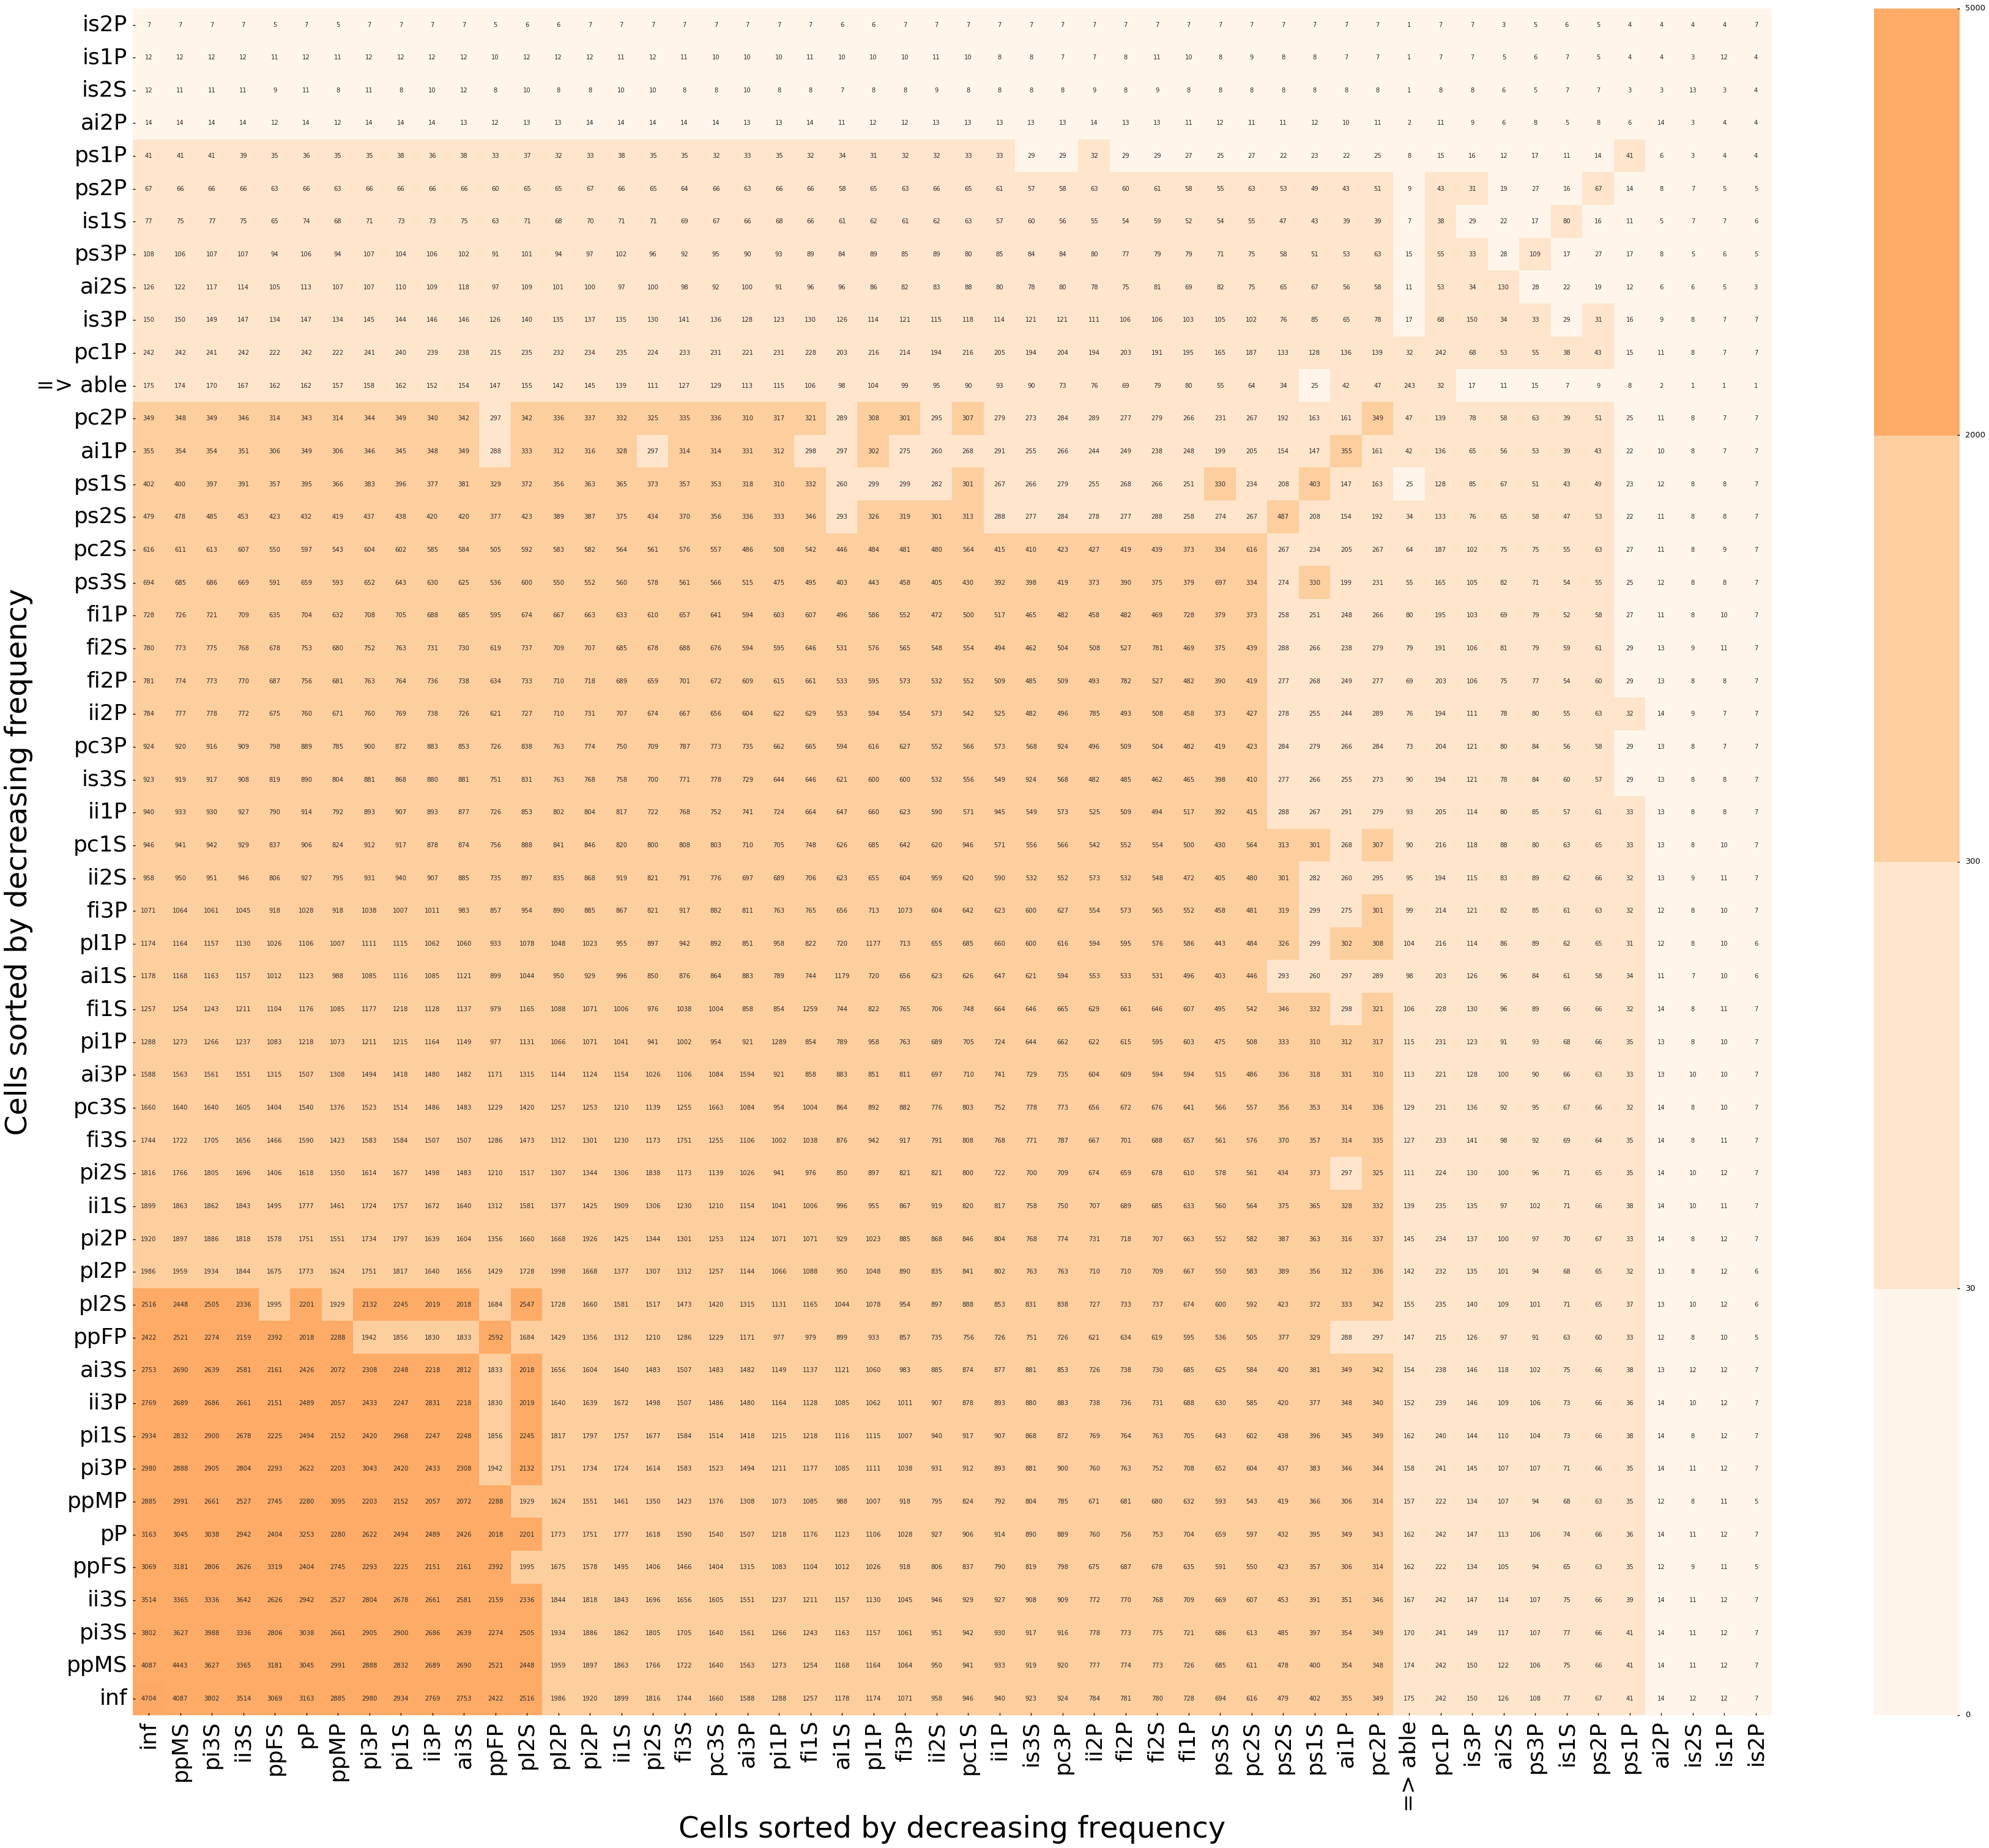

In [126]:
sortedSampleCases=sortCellFrequency(df)
print sortedSampleCases
df=df[sortedSampleCases]
df=df.reindex(sortedSampleCases[::-1])
heatmap(df)
plt.xlabel('Cells sorted by decreasing frequency',fontsize=48) 
plt.ylabel('Cells sorted by decreasing frequency',fontsize=48) 
plt.xticks(fontsize=36, rotation=90) 
plt.yticks(fontsize=36, rotation=0) 
#plt.show()
if saveFiles: plt.savefig("HM-VAble.png",dpi=150, bbox_inches="tight")

In [ ]:
df.stack().quantile(.395)

In [ ]:
df["=> able"].mean()

In [82]:
dfForms=dfVerbes3Join
dfParadigmes=dfForms.pivot_table(values='ortho', index=['lexeme'], columns=['case'], aggfunc=lambda x: ",".join(x)).reset_index().reindex()
df=tableauPaires(dfParadigmes)["nbPaires"]

[u'inf', u'ppMS', u'pi3S', u'ii3S', u'ppFS', u'pP', u'ppMP', u'pi3P', u'pi1S', u'ii3P', u'ai3S', u'ppFP', u'pI2S', u'pI2P', u'pi2P', u'ii1S', u'pi2S', u'fi3S', u'pc3S', u'ai3P', u'pi1P', u'fi1S', u'ai1S', u'pI1P', u'fi3P', u'ii2S', u'pc1S', u'ii1P', u'is3S', u'pc3P', u'ii2P', u'fi2P', u'fi2S', u'fi1P', u'ps3S', u'pc2S', u'ps2S', u'ps1S', u'ai1P', u'pc2P', u'pc1P', u'is3P', u'ai2S', u'ps3P', u'is1S', u'ps2P', u'ps1P', u'ai2P', u'is2S', u'is1P', u'is2P']


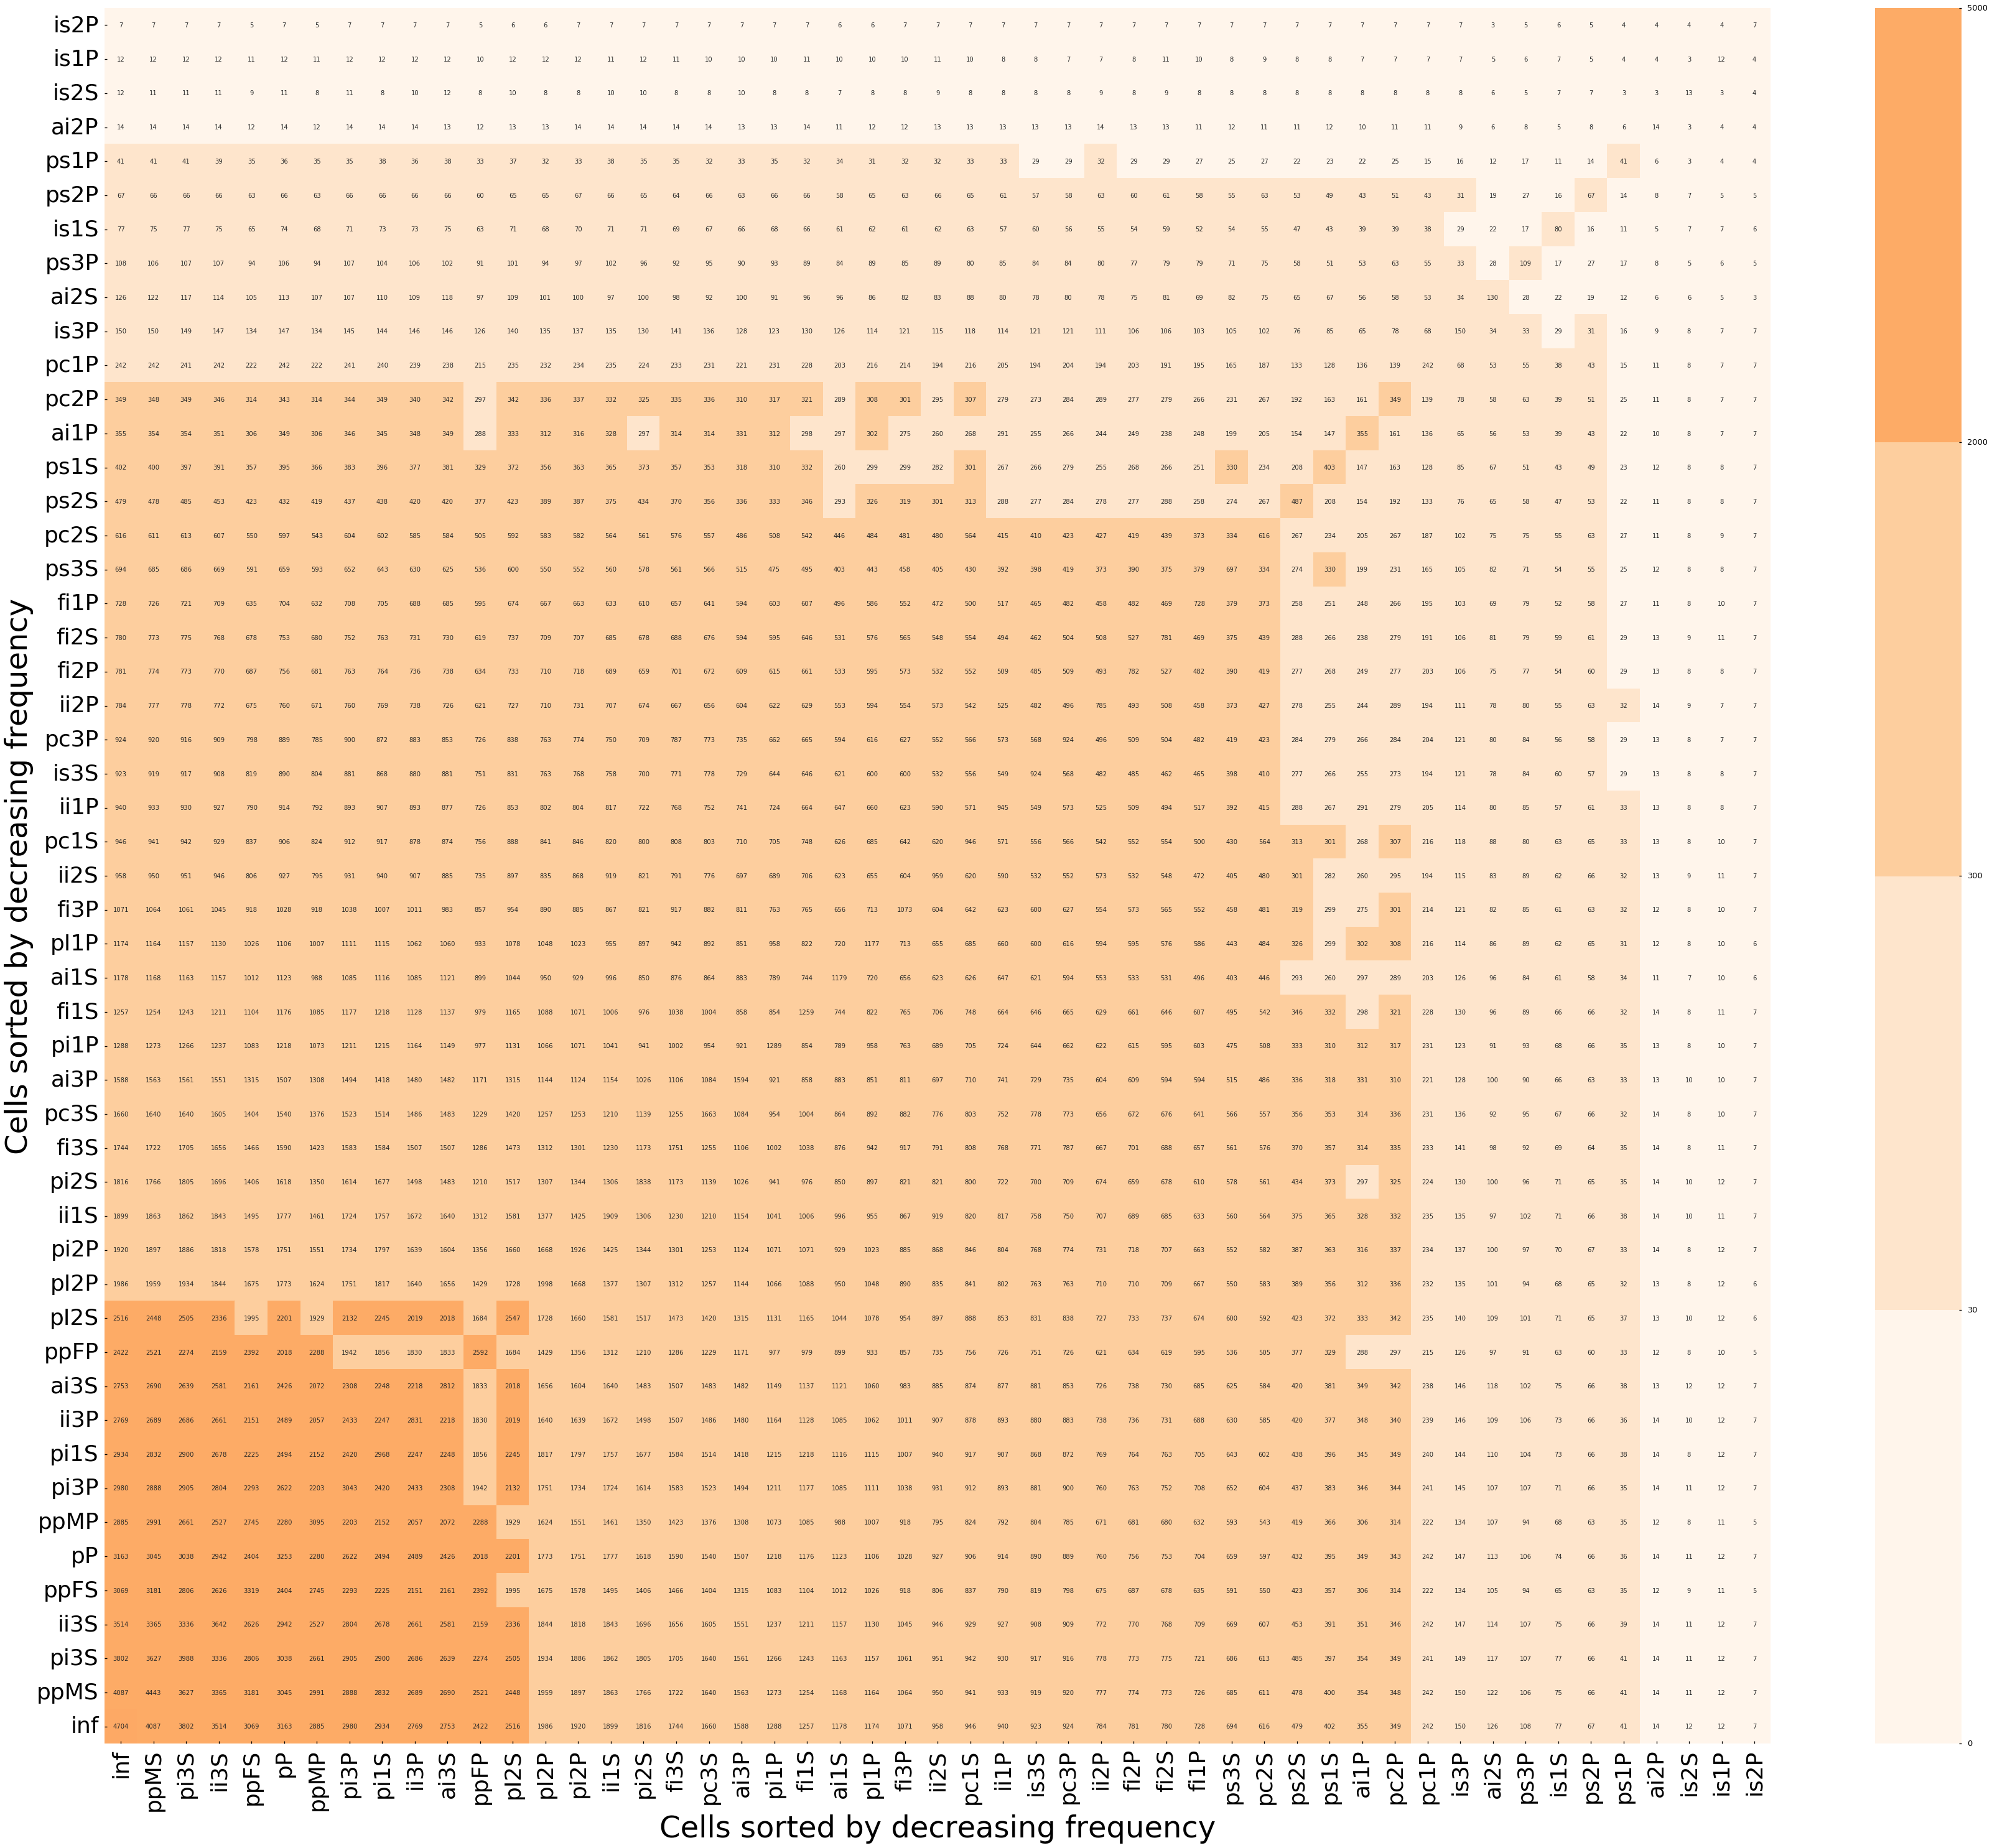

In [83]:
sortedSampleCases=sortCellFrequency(df)
print sortedSampleCases
df=df[sortedSampleCases]
df=df.reindex(sortedSampleCases[::-1])
heatmap(df)
plt.xlabel('Cells sorted by decreasing frequency',fontsize=48) 
plt.ylabel('Cells sorted by decreasing frequency',fontsize=48) 
plt.xticks(fontsize=36, rotation=90) 
plt.yticks(fontsize=36, rotation=0) 
#plt.show()
#if saveFiles: plt.savefig("HM-VLex3.png",dpi=150, bbox_inches="tight")
plt.savefig("HM-VLex3.pdf", bbox_inches="tight")

In [84]:
dfParadigmes[dfParadigmes["lexeme"]==u"manger"].to_dict()

{u'ai1P': {3030: u'mange\xe2mes'},
 u'ai1S': {3030: u'mangeai'},
 u'ai2P': {3030: nan},
 u'ai2S': {3030: u'mangeas'},
 u'ai3P': {3030: u'mang\xe8rent'},
 u'ai3S': {3030: u'mangea'},
 u'fi1P': {3030: u'mangerons'},
 u'fi1S': {3030: u'mangerai'},
 u'fi2P': {3030: u'mangerez'},
 u'fi2S': {3030: u'mangeras'},
 u'fi3P': {3030: u'mangeront'},
 u'fi3S': {3030: u'mangera'},
 u'ii1P': {3030: u'mangions'},
 u'ii1S': {3030: u'mangeais'},
 u'ii2P': {3030: u'mangiez'},
 u'ii2S': {3030: u'mangeais'},
 u'ii3P': {3030: u'mangeaient'},
 u'ii3S': {3030: u'mangeait'},
 u'inf': {3030: u'manger'},
 u'is1P': {3030: nan},
 u'is1S': {3030: u'mangeasse'},
 u'is2P': {3030: nan},
 u'is2S': {3030: nan},
 u'is3P': {3030: nan},
 u'is3S': {3030: u'mange\xe2t'},
 'lexeme': {3030: u'manger'},
 u'pI1P': {3030: u'mangeons'},
 u'pI2P': {3030: u'mangez'},
 u'pI2S': {3030: u'mange'},
 u'pP': {3030: u'mangeant'},
 u'pc1P': {3030: u'mangerions'},
 u'pc1S': {3030: u'mangerais'},
 u'pc2P': {3030: u'mangeriez'},
 u'pc2S': {3030

In [93]:
dfVerbes3Join

,lexeme,case,ortho
40,avoir,pi3S,a
45,abaisser,ai3S,abaissa
46,abaisser,ai1S,abaissai
47,abaisser,ii3P,abaissaient
50,abaisser,ii3S,abaissait
52,abaisser,pP,abaissant
64,abaisser,pi1S,abaisse
66,abaisser,pI2S,abaisse
67,abaisser,pi3S,abaisse
71,abaisser,pi3P,abaissent


In [ ]:
dfForms=dfVerbes3Join[dfVerbes3Join["lexeme"].isin(min2Verbes3)]
dfParadigmes=dfForms.pivot_table(values='ortho', index=['lexeme'], columns=['case'], aggfunc=lambda x: ",".join(x)).reset_index().reindex()
df=tableauPaires(dfParadigmes)["nbPaires"]

In [112]:
diagonaleDF=0
for c in range(51):
    diagonaleDF+=df.iloc[c,c].item()
print (df.sum().sum()-diagonaleDF)/2
(51*4926*51-51*4926)/2

812442


6280650

[u'inf', u'ppMS', u'pi3S', u'ii3S', u'ppFS', u'pP', u'ppMP', u'pi3P', u'pi1S', u'ii3P', u'ai3S', u'ppFP', u'pI2S', u'pI2P', u'pi2P', u'ii1S', u'pi2S', u'fi3S', u'pc3S', u'ai3P', u'pi1P', u'fi1S', u'ai1S', u'pI1P', u'fi3P', u'ii2S', u'pc1S', u'ii1P', u'pc3P', u'is3S', u'ii2P', u'fi2P', u'fi2S', u'fi1P', u'ps3S', u'pc2S', u'ps2S', u'ps1S', u'ai1P', u'pc2P', u'pc1P', u'is3P', u'ai2S', u'ps3P', u'is1S', u'ps2P', u'ps1P', u'ai2P', u'is2S', u'is1P', u'is2P']


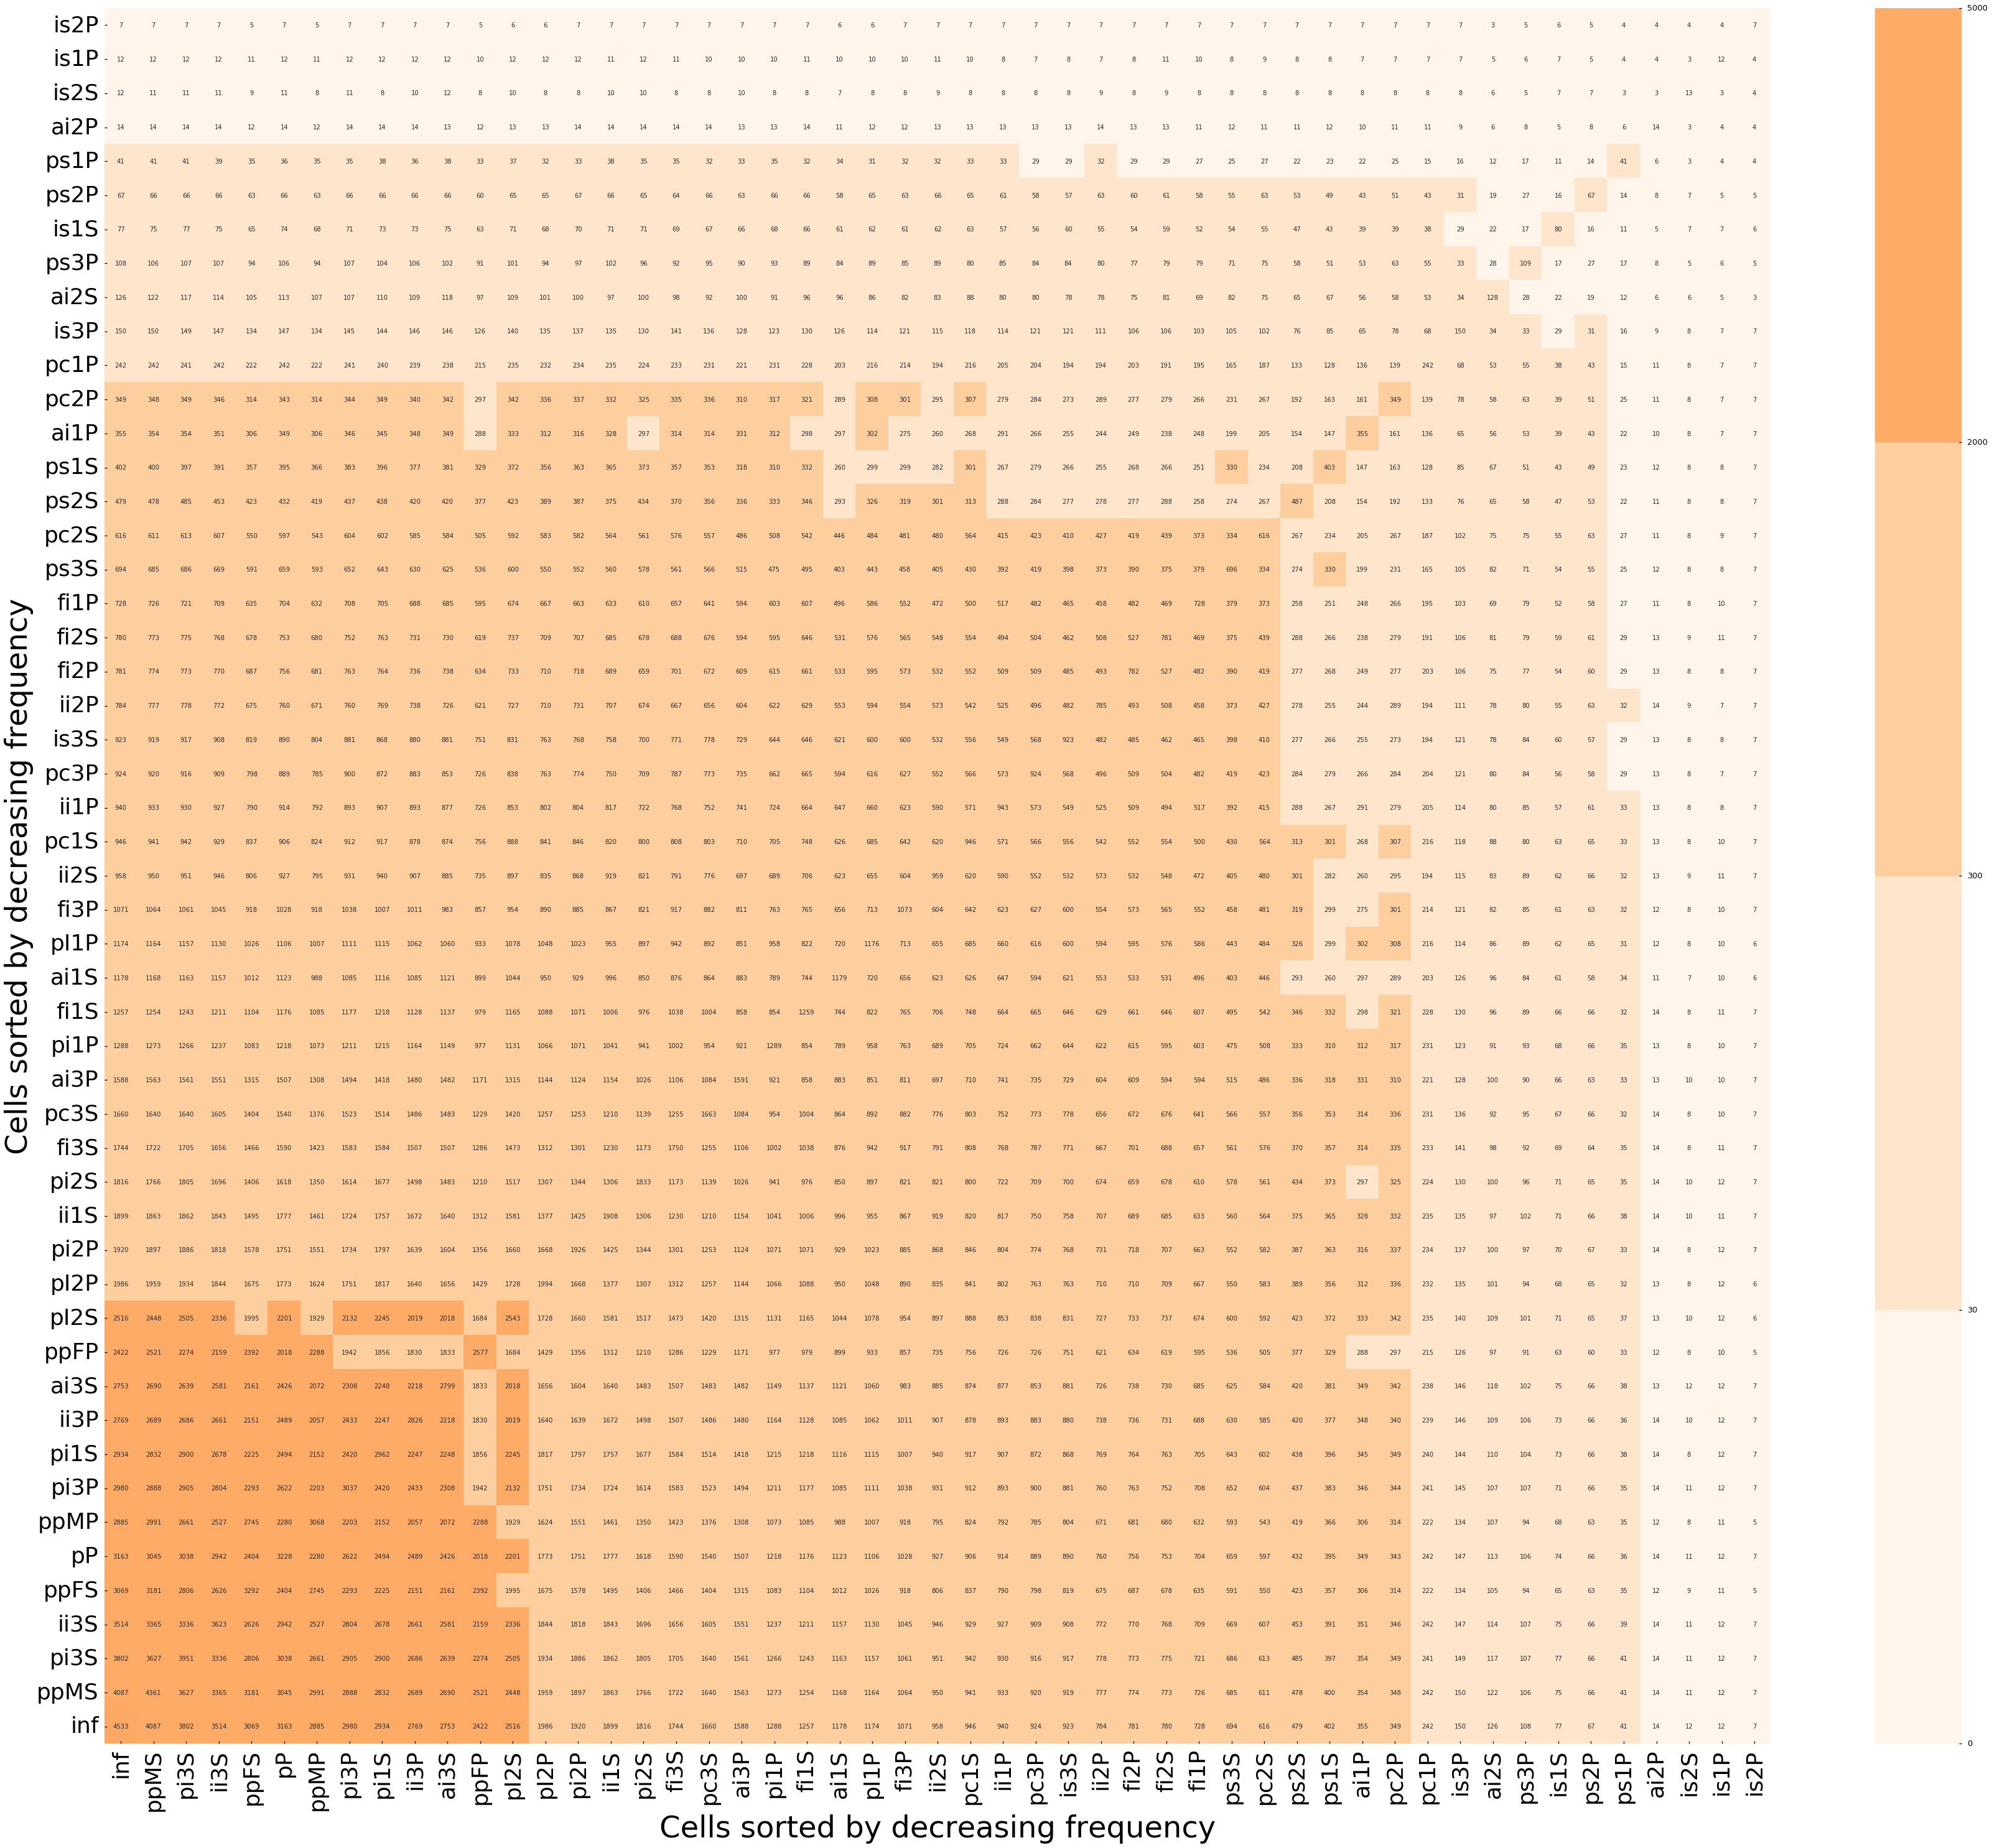

In [95]:
sortedSampleCases=sortCellFrequency(df)
print sortedSampleCases
df=df[sortedSampleCases]
df=df.reindex(sortedSampleCases[::-1])
heatmap(df)
plt.xlabel('Cells sorted by decreasing frequency',fontsize=48) 
plt.ylabel('Cells sorted by decreasing frequency',fontsize=48) 
plt.xticks(fontsize=36, rotation=90) 
plt.yticks(fontsize=36, rotation=0) 
#plt.show()
#if saveFiles: plt.savefig("HM-VLex3.png",dpi=150, bbox_inches="tight")
plt.savefig("HM-VLex3.pdf", bbox_inches="tight")